# Classification Intro
## Types of Classification
### Binary Classification
`is this A or B?`,  `SPAM or NOT SPAM?`

### Multi-Class Classification
`Is this pizza, steak, or sushi?` `Is this a 1 or a 9?` 

### Multi-Label Classification
`What tags/labels should this article get?`  

## Topics To Consider With Classification Models
- the architecture of a neural network
- Input & Output shapes
  - photos of food to identified foods 
- Steps in modeling (creating, compiling, fitting, and evaluationg)
- Evaluation methods
- saving + loading a model

## Classification Example: Photo-to-food
### The Overview
- photos are (square) pixels
- photos have dimensions, say 256x256
- photos have pixels with colors, say rgb strings
- the pixels can be broken down into numbers based on img pixel coordinates
- the pixel numbers can be converted to tensors
- the tensors can get passed to models....etc

### The Inputs & Outputs
Pixels get converted to tensors & passed to machine learning models.  
Inputs could look like...
- `[batch_size, img_width, img_height, colour_channels]`
Outputs could look like...
- `[%likeSushi, %likeSteak, %likePotatos, ...etc]`

## Architecture of A Classification model
A Classification model could...
- be a sequential model
- contain several layers
  - an Input layer with a defined shape
  - an activiation-specified set of "inner" layers
  - a "softmax" final layer

### Classification Model Details & Hyperparameters
- **Input Layer Shape**: same as the number of features
- **Hidden Layers**: Problem-specific (_minimum 1 & maximum unlimited..._)
- **Neuros-Per-Hidden-Layer**: Problem-specific (generally 10-100)
- **Output layer shape**: 1-per-classification
- **Hidden Activation**: usually ReLu (rectified linear unit)
- **Output Activation**: usually softmax for multi-class or sigmoid for binary class
- **Loss Function**: Cross Entropy (categorical or binary)
- **Optimizer**: SGD or Adam

## A Mock Classification Example
### Make Some Data

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# make_circles:
# A simple toy dataset to visualize clustering and classification algorithms.
# returns X as array of numbers
# returns y as binary classification options

# how much data
sampleCount = 1000
X, y = make_circles(sampleCount, noise=0.03, random_state=42)


# convert to pd datafram
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


### Visualize the data

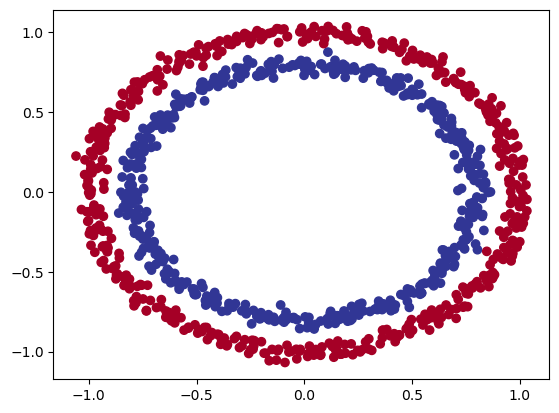

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### Inspect Data Shapes

In [3]:
print(f'data SHAPES --> X: {X.shape}, Y: {y.shape}')
print(f'data LENGTHS --> X: {len(X)}, Y: {len(y)}')

data SHAPES --> X: (1000, 2), Y: (1000,)
data LENGTHS --> X: 1000, Y: 1000


In [4]:
X[0]

array([0.75424625, 0.23148074])

In [5]:
y[0]

1

### Model: Creation, Compilation, & Fit

In [6]:
tf.random.set_seed(42)
l1 = tf.keras.layers.Dense(1)
m1EpochCount = 5

# Create
m1 = tf.keras.Sequential()
m1.add(l1)

# Compile
m1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
# Fit
m1.fit(X, y, epochs=m1EpochCount)

Epoch 1/5
32/32 [==============================] - 2s 5ms/step - loss: 6.0745 - accuracy: 0.4930
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 5.7456 - accuracy: 0.4850
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 5.4005 - accuracy: 0.4910
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 4.1406 - accuracy: 0.4850
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7826 - accuracy: 0.4910


### Model: More Epochs
The previous run looks like the accuracy is `~50%`. That's pretty bad.  

In [7]:
moreEpochs = 200
m1.fit(X, y, epochs=moreEpochs, verbose=0)

In [8]:
m1.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

### Model: Add Another Layer
Looks like more epochs did NOT make a meaningful impact.

In [9]:
midEpochs = 100
m2 = tf.keras.Sequential()
m2.add(l1)
m2.add(l1)
m2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
m2.fit(X, y, epochs=midEpochs, verbose=0)

In [10]:
m2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

Looks like MORE LAYERS didn't really help either: the accuracy is still `~50%`.

### Models: Ways To Update
- add layers
- increase the number of hidden units
- change the activation function
- change the optimization function
- change the learning rate
- fit more data
- fit for longer

### Models: Add Layer Hidden Units

In [11]:
m3 = tf.keras.Sequential()
dense100 = tf.keras.layers.Dense(100)
dense10 = tf.keras.layers.Dense(10)
dense1 = tf.keras.layers.Dense(1)

m3.add(dense100)
m3.add(dense10)
m3.add(dense1)

m3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
m3.fit(X,y,epochs=100, verbose=0)

In [12]:
m3.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Still no meaningful updates :(

### Model: Visualize Predictions
Create a reusable function that takes the `model`, the `x` & the `y` input and uses matplotlib to draw a chart

In [15]:
def plot_decision_boundary(model, X, y):
  """
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  #
  # Define the axis boundaries of the plot and create a meshgrid
  #
  x_axis_min, x_axis_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_axis_min, y_axis_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  axis_points = np.linspace(x_axis_min, x_axis_max, 100)
  xx, yy = np.meshgrid(axis_points,axis_points)
  
  #
  # Create X values (we're going to predict on all of these)
  #
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  #
  # Make predictions using the trained model
  #    
  y_pred = model.predict(x_in)

  #
  # Check for multi-class
  #
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  #
  # Plot decision boundary
  #
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 4ms/step
doing binary classifcation...


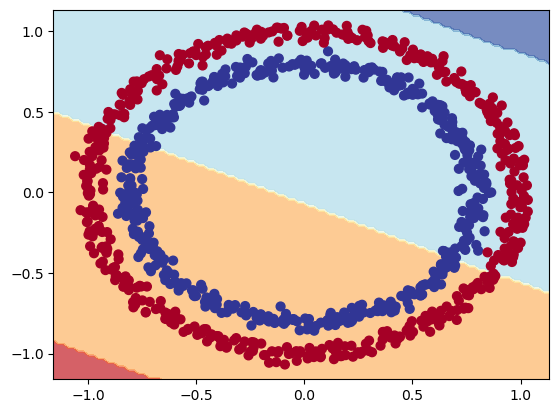

In [14]:
plot_decision_boundary(m3, X, y)

### Model: Several updates
- 2x dense layer with 4 neurons with relu activation
- output layer with 1 neuron, sigmoid activation
- learning-rate of .001

In [17]:
denseRelu4 = tf.keras.layers.Dense(4, activation="relu")
denseSigmoid1 = tf.keras.layers.Dense(1, activation="sigmoid")
tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
# Create a model
m5 = tf.keras.Sequential()
m5.add(denseRelu4)
m5.add(denseRelu4)
m5.add(denseSigmoid1)

# Compile the model
m5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
m5History = m5.fit(X, y, epochs=100, verbose=0)

In [18]:
m5.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.5813 - accuracy: 0.8900


[0.5812528729438782, 0.8899999856948853]

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


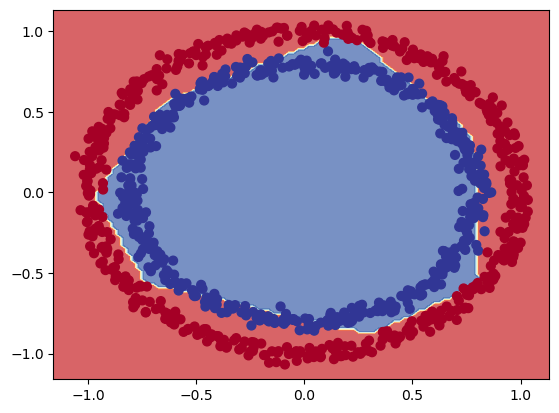

In [19]:
plot_decision_boundary(m5, X, y)